<a href="https://colab.research.google.com/github/Larasati11/PCVK/blob/main/Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Soal 3

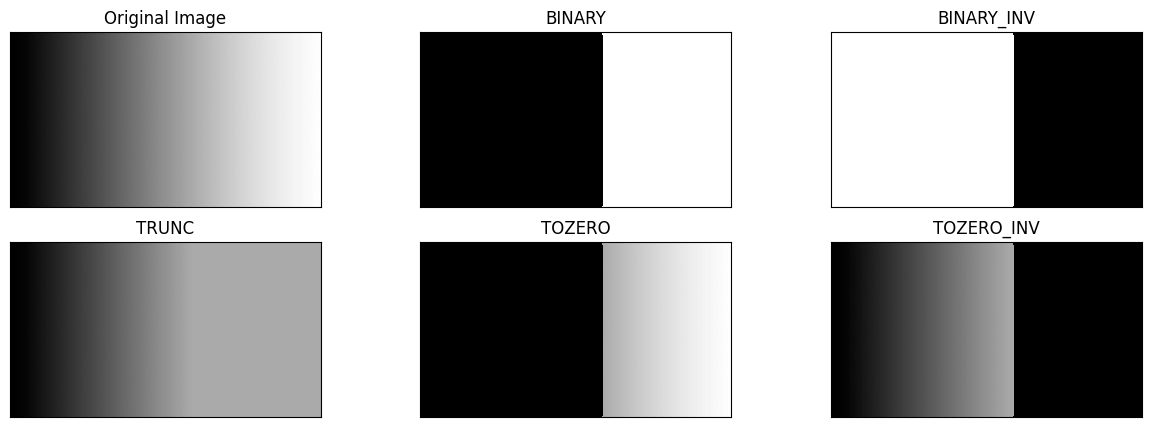

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# Soal 4

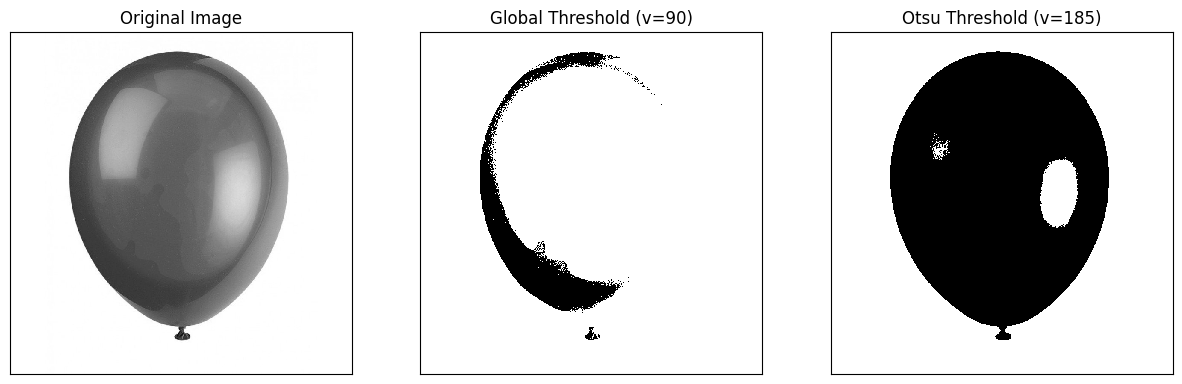

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
filename = '/content/drive/MyDrive/balloon.jpg'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Step 1: Compute the histogram
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Step 2: Global thresholding with threshold value v = 90
global_thresh_value = 90
_, global_thresh_img = cv2.threshold(img, global_thresh_value, 255, cv2.THRESH_BINARY)

# Step 3: Implement Otsu's thresholding manually
total_pixels = img.size
current_max = 0
threshold = 0
sum_total, sumB = 0, 0
weightB, weightF = 0, 0

for i in range(256):
    sum_total += i * hist[i]

for i in range(256):
    weightB += hist[i]  # Background weight
    if weightB == 0:
        continue

    weightF = total_pixels - weightB  # Foreground weight
    if weightF == 0:
        break

    sumB += i * hist[i]
    meanB = sumB / weightB  # Mean Background
    meanF = (sum_total - sumB) / weightF  # Mean Foreground

    # Calculate Between Class Variance
    var_between = weightB * weightF * (meanB - meanF) ** 2

    # Check if the current variance is greater than the maximum found so far
    if var_between > current_max:
        current_max = var_between
        threshold = i

# Apply Otsu's threshold to the image
_, otsu_thresh_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

# Display the original image, global threshold image, and Otsu's threshold image
titles = ['Original Image', f'Global Threshold (v={global_thresh_value})', f'Otsu Threshold (v={threshold})']
images = [img, global_thresh_img, otsu_thresh_img]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


# Soal 5

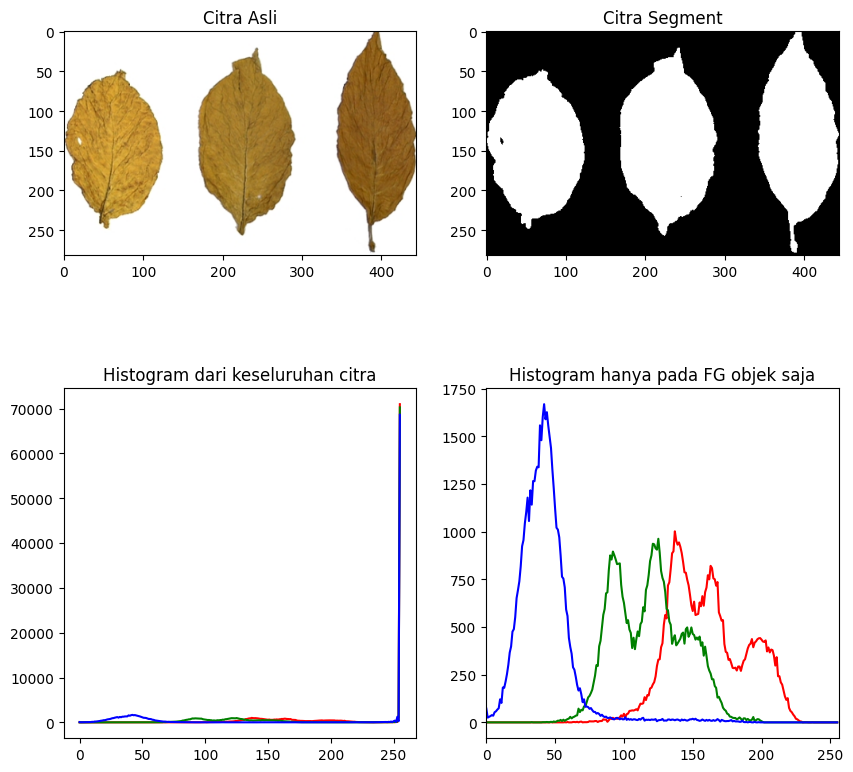

In [9]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Load the image after verifying the correct path
filename = '/content/drive/MyDrive/tobacco.jpg'

img = cv2.imread(filename)
if img is None:
    print("Error: Image not found. Check the file path.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ret3, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1), plt.imshow(img)
    plt.title('Citra Asli')
    plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
    plt.title('Citra Segment')

    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        hist0 = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.subplot(2, 2, 3), plt.plot(hist0, color=col)
        plt.title('Histogram dari keseluruhan citra')

        hist1 = cv2.calcHist([img], [i], mask, [256], [0, 256])
        plt.subplot(2, 2, 4), plt.plot(hist1, color=col)
        plt.title('Histogram hanya pada FG objek saja')
        plt.xlim([0, 256])

    plt.show()


# Soal 6

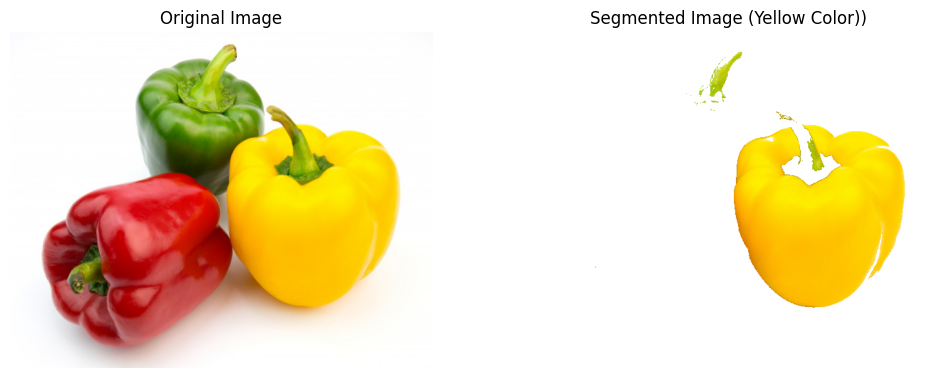

In [13]:
# Load the image
filename = '/content/drive/MyDrive/peppers.jpg'
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria, number of clusters(K) and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values
centers = np.uint8(centers)
labels = labels.flatten()

# Map each pixel to the centroid (color) representing its cluster
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img_rgb.shape)


yellow_cluster_index = np.argmin(np.linalg.norm(centers - [255, 255, 0], axis=1))
mask = (labels == yellow_cluster_index)

# Create an image that highlights only the yellow parts with a white background
highlighted_image = np.full_like(img_rgb, fill_value=255)
highlighted_image[mask.reshape(img_rgb.shape[:2])] = img_rgb[mask.reshape(img_rgb.shape[:2])]

# Display the original image and the segmented image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(highlighted_image)
plt.title('Segmented Image (Yellow Color))')
plt.axis('off')

plt.show()


# Soal 7

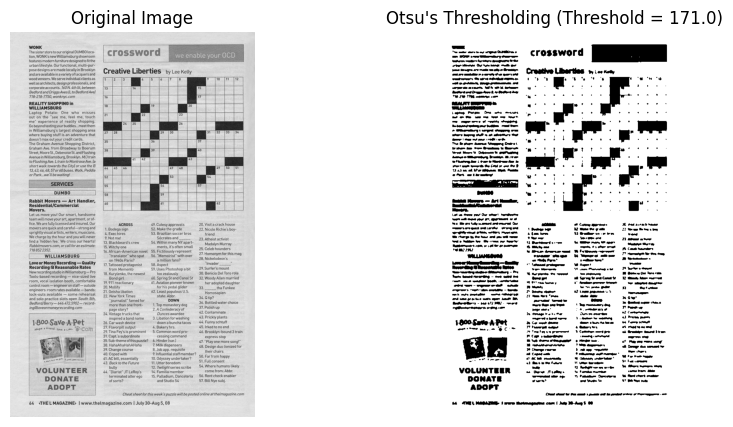

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename = '/content/drive/MyDrive/crossword.jpg'
img = cv2.imread(filename, 0)  # Load the image in grayscale mode

# Apply Gaussian Blur to reduce noise
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Otsu's thresholding
ret, otsu_thresh = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f'Otsu\'s Thresholding (Threshold = {ret})')
plt.axis('off')

plt.show()
